# Kalorimetrie Laborversuch

Author: Paul Bobrinskoy

Datum: 15/12/2023

Gruppe: 77

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

-Wie wirkt sich die Variation der elektrischen Leistung des Tauchsieders auf die Genauigkeit der Kalorimeterkonstanten und der spezifischen Wärmekapazität der Proben aus?

-Inwiefern beeinflusst die Temperaturdifferenz zwischen dem Heißwasserbad und den Proben die Genauigkeit der Messung bei der Bestimmung der spezifischen Wärmekapazität?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.


<img src="figures/Laborversuch_Kalorimetrie_1.jpg" width="800">


Es handelt sich um einen Versuch zur Bestimmung der Kalorimeterkonstanten. Wir verwenden einen Becher, der mit 400 g Wasser gefüllt ist. Dieser Becher ist mit drei verschiedenen Temperatursensoren ausgestattet, um mögliche Abweichungen zu erfassen. Die gemessene Temperaturen bekommen wir dann auf den Laptop/RaspberryPi, und können damit die Kalorimeterkonstante berechnen. Zusätzlich ist der Becher bzw. das Wasser über ein Labornetzgerät verbunden und enthält einen Magnetrührer.

Ein Tauchsieder wird vollständig in das Wasser eingetaucht, während es erhitzt wird.

## Versuchsauswertung

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [4]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/calorimetry_constant/calorimetry_constant.h5"

# DONE #

In [5]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

group_path = 'RawData/'
data_dict = utility.get_plot_data_from_dataset(datafile_path_const, group_path)
print(data_dict)

# DONE #

{'temperature': array([[21.125 , 21.1875, 21.1875, 21.125 , 21.125 , 21.1875, 21.1875,
        21.1875, 21.1875, 21.1875, 21.1875, 21.25  , 21.375 , 21.4375,
        21.5625, 21.625 , 21.75  , 21.875 , 22.    , 22.0625, 22.1875,
        22.3125, 22.375 , 22.5   , 22.625 , 22.75  , 22.75  , 22.9375,
        23.0625, 23.1875, 23.3125, 23.4375, 23.4375, 23.625 , 23.75  ,
        23.875 , 23.9375, 24.0625, 24.1875, 24.25  , 24.375 , 24.5   ,
        24.625 , 24.6875, 24.8125, 24.9375, 25.0625, 25.125 , 25.25  ,
        25.375 , 25.4375, 25.5625, 25.6875, 25.75  , 25.8125, 25.8125,
        25.8125, 25.8125],
       [21.25  , 21.25  , 21.25  , 21.25  , 21.25  , 21.25  , 21.25  ,
        21.3125, 21.3125, 21.3125, 21.3125, 21.375 , 21.4375, 21.5625,
        21.6875, 21.6875, 21.6875, 22.    , 22.125 , 22.1875, 22.3125,
        22.4375, 22.5   , 22.625 , 22.75  , 22.875 , 22.9375, 23.0625,
        23.125 , 23.25  , 23.375 , 23.4375, 23.625 , 23.6875, 23.8125,
        23.8125, 24.    , 24.125 ,

In [6]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

sensor_uuid = np.unique(data_dict['name'])
print("Sensor Names:")
print(sensor_uuid)
print()

calorimeter_sensors = [sensor_uuid[0], sensor_uuid[1], sensor_uuid[2]]
environment_sensor = [sensor_uuid[3]]

# Create variables for sensor indices
index_calorimeter = []
index_environment = []

# Iterate through the 'name' array and categorize sensors based on their positions
for i, sensor_id in enumerate(data_dict['name'].flatten()):
    if any(prefix in sensor_id for prefix in calorimeter_sensors):
        index_calorimeter.append(i)
    elif "1ee5ec04-c845-69e2-853a-25c11543466f" in sensor_id:
        index_environment.append(i)
        
# Print the results
print("Index of calorimeter sensors:")
print(index_calorimeter)
print()
print("Index of environment sensor:")
print(index_environment)


# DONE #

Sensor Names:
['1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde'
 '1ee5ec03-7e64-6071-8ca3-98dbab0a7719'
 '1ee5ec04-30cd-678f-a64b-0ce7544ef5e8'
 '1ee5ec04-c845-69e2-853a-25c11543466f']

Index of calorimeter sensors:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173]

Index of environment sensor:
[17

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [7]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.


mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_environment)

print("Average value and Standard deviation of the calorimeter sensors:")
print(mean_std_calorimeter)
print()
print("Average value and Standard deviation of the environment sensor:")
print(mean_std_environment)
# DONE #

Average value and Standard deviation of the calorimeter sensors:
[[86.5       ]
 [50.22864389]]

Average value and Standard deviation of the environment sensor:
[[202.5       ]
 [ 16.74066904]]


#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

In [8]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

# List of legend labels, time and temperature
legend = ["Calorimeter Sensor 1", "Calorimeter Sensor 2", "Calorimeter Sensor 3", "Environment Sensor"]
time = data_dict['time'][0]
sensor1 = data_dict['temperature'][0]
sensor2 = data_dict['temperature'][1]
sensor3 = data_dict['temperature'][2]
sensor4 = data_dict['temperature'][3]
data = [sensor1, sensor2, sensor3, sensor4]

utility.plot_temp_over_time(data, time, legend, "Time in s", "Temperature in °C") 

# DONE #

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [10]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

# Path to the folder containing JSON files and subfolders.
folder_path = "datasheets"

# The UUID associated with the relevant metadata entry for water mass
uuid = "1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753"

# The JSON path to the water mass information
water_mass_json_path = ["calorimeter", "medium", "mass", "value"]

# Use the get_json_entry function to obtain the water mass
water_mass = m_json.get_json_entry(folder_path, uuid, water_mass_json_path)

print()
print("-->The mass of water is:", water_mass,"g")
# should give "401g"

# DONE #

datasheets/actor_immersionHeater.json
datasheets/actor_sousvide.json
datasheets/calorimeter.json

-->The mass of water is: 401 g


In [11]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

# and the UUIDs for the heater-related data
heater_uuid = "1ee21744-0355-6023-94b4-d5c041dd32cd"

# Open the HDF5 file
with h5.File(datafile_path_const, "r") as file:
    # if heater_uuid in file["RawData"]:
        heater_group = file["RawData"][heater_uuid]
        
        current = heater_group["Current"]        
        heat_time = heater_group["Heat time"]
        voltage = heater_group["Voltage"]
            

#current = None
#heat_time = None
#voltage = None

print(current)
print(heat_time)
print(voltage)

# DONE #

<Closed HDF5 dataset>
<Closed HDF5 dataset>
<Closed HDF5 dataset>


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [12]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_data = data_dict['temperature']
threshold_value = 0.05

temperature_end, temperature_start = utility.get_start_end_temperature(temperature_data, threshold = threshold_value) 

print("Final temperature:", temperature_end,"°C")
print()
print("Initial temperature:", temperature_start,"°C")
# DONE #

Final temperature: 25.807291666666668 °C

Initial temperature: 21.008333333333333 °C


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [13]:
# TODO: Calculate heat capacity of the calorimeter
voltage = 12   # in V
current = 4    # in A
heat_time = 60 # in s

U = voltage  # Replace with the actual voltage
I = current  # Replace with the actual current
delta_t = heat_time  # Replace with the actual time difference

calorimeter_const = U * I * delta_t / (temperature_end - temperature_start)

# DONE #

#### (Vii) Ergebnis

In [14]:
print("Calorimeter Constant:", calorimeter_const)

Calorimeter Constant: 600.1302365964834


### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [15]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/heat_capacity_probe005/heat_capacity_probe005.h5"

# DONE #

In [16]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

group_path = 'RawData/'
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, group_path)
print(data_dict)

# DONE #

{'temperature': array([[21.    , 21.    , 21.    , 21.0625, 21.    , 21.    , 21.0625,
        21.0625, 21.    , 21.0625, 21.5   , 23.4375, 25.4375, 26.8125,
        27.6875, 28.3125, 28.75  , 28.9375, 29.125 , 29.25  , 29.3125,
        29.3125, 29.4375, 29.4375, 29.4375, 29.4375, 29.4375, 29.4375,
        29.4375, 29.4375],
       [21.125 , 21.125 , 21.125 , 21.125 , 21.125 , 21.125 , 21.125 ,
        21.125 , 21.125 , 21.125 , 21.8125, 23.8125, 25.6875, 26.9375,
        27.8125, 28.375 , 28.75  , 29.    , 29.1875, 29.25  , 29.3125,
        29.375 , 29.375 , 29.375 , 29.4375, 29.4375, 29.4375, 29.4375,
        29.4375, 29.4375],
       [20.8125, 20.8125, 20.875 , 20.8125, 20.8125, 20.8125, 20.8125,
        20.8125, 20.8125, 20.875 , 21.8125, 23.8125, 25.5   , 26.6875,
        27.5625, 28.125 , 28.5   , 28.75  , 28.75  , 29.    , 29.0625,
        29.125 , 29.125 , 29.125 , 29.125 , 29.125 , 29.125 , 29.1875,
        29.1875, 29.125 ],
       [21.375 , 21.375 , 21.375 , 21.375 , 21.375 

In [17]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

sensor_uuid = np.unique(data_dict['name'])
print("Unique Sensor Names:", sensor_uuid)
print()

calorimeter_sensors = [sensor_uuid[0], sensor_uuid[1], sensor_uuid[2]]
environment_sensor = [sensor_uuid[3]]
bath_sensor = [sensor_uuid[4]]

index_calorimeter = []
index_bath = []
index_env = []


# Iterate through the 'name' array and categorize sensors based on their positions
for i, sensor_id in enumerate(data_dict['name'].flatten()):
    if any(prefix in sensor_id for prefix in calorimeter_sensors):
        index_calorimeter.append(i)
    elif "1ee5ec05-4aea-68f6-ad82-53b16fffae49" in sensor_id:
        index_bath.append(i)
    elif "1ee5ec04-c845-69e2-853a-25c11543466f" in sensor_id:
        index_env.append(i)

# Print the results
print("Index of sensors in calorimeter:")
print(index_calorimeter)
print()
print("Index of sensors in bath:")
print(index_bath)
print()
print("Index of sensors in environment:")
print(index_env)

# DONE #

Unique Sensor Names: ['1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde'
 '1ee5ec03-7e64-6071-8ca3-98dbab0a7719'
 '1ee5ec04-30cd-678f-a64b-0ce7544ef5e8'
 '1ee5ec04-c845-69e2-853a-25c11543466f'
 '1ee5ec05-4aea-68f6-ad82-53b16fffae49']

Index of sensors in calorimeter:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]

Index of sensors in bath:
[120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]

Index of sensors in environment:
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [18]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_env)
mean_std_heater = utility.cal_mean_and_standard_deviation(index_bath)

print("Mean and Standard Deviation for Calorimeter sensors:")
print(mean_std_calorimeter)
print("Mean and Standard Deviation for Environment sensors:")
print(mean_std_environment)
print("Mean and Standard Deviation for Heater sensors:")
print(mean_std_heater)
# DONE #

Mean and Standard Deviation for Calorimeter sensors:
[[44.5       ]
 [25.97915831]]
Mean and Standard Deviation for Environment sensors:
[[104.5       ]
 [  8.65544145]]
Mean and Standard Deviation for Heater sensors:
[[134.5       ]
 [  8.65544145]]


#### (iii) Daten ploten

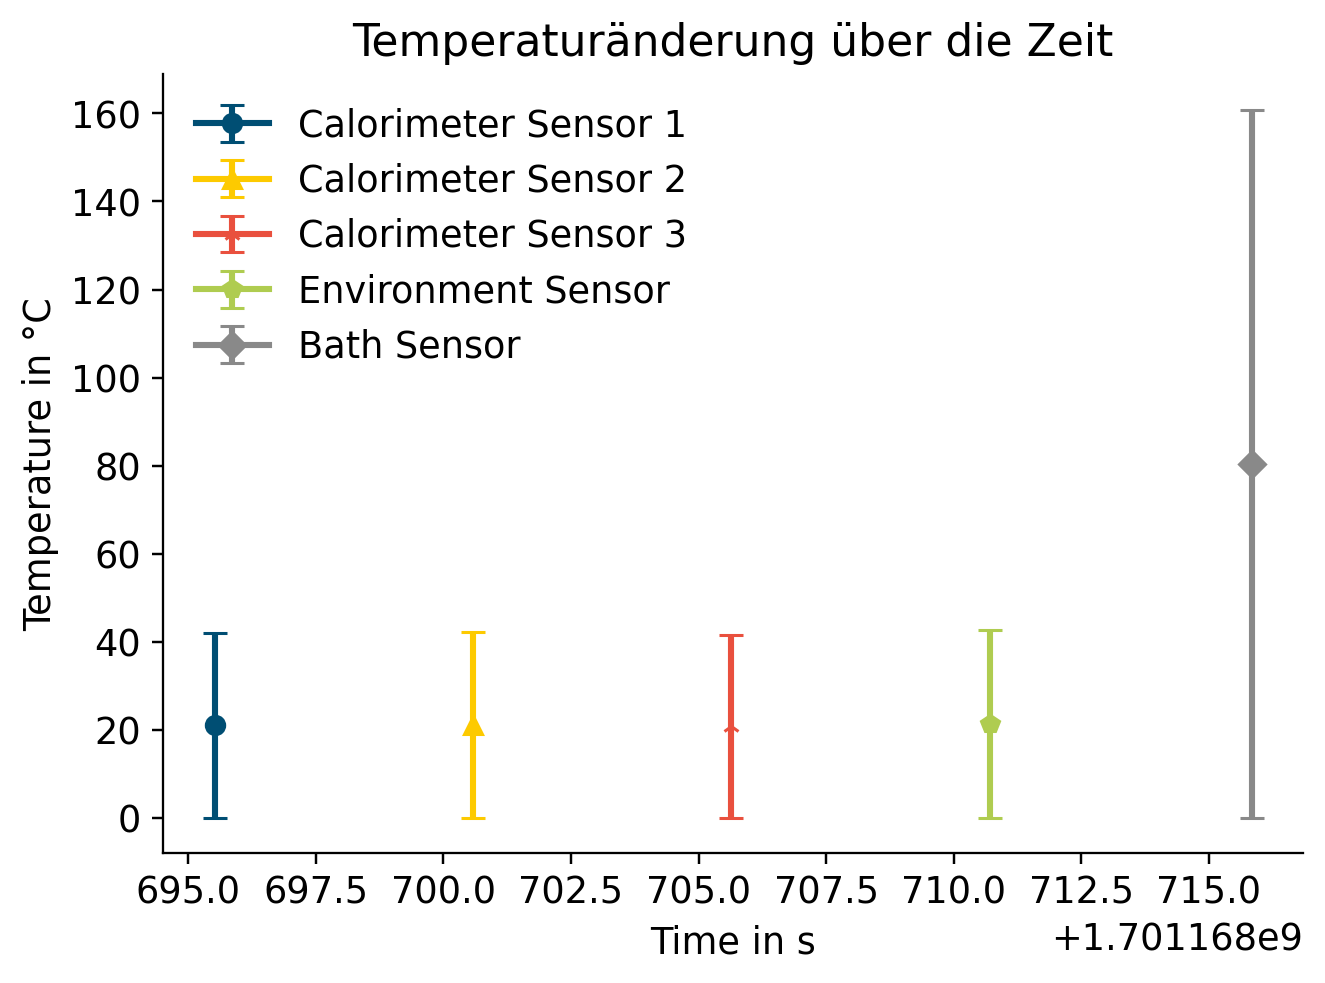

In [19]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
# List of legend labels, time and temperature
legend = ["Calorimeter Sensor 1", "Calorimeter Sensor 2", "Calorimeter Sensor 3", "Environment Sensor", "Bath Sensor"]
time = data_dict['time'][0]
data = data_dict['temperature']

utility.plot_temp_over_time(data, time, legend, "Time in s", "Temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

In [20]:
# TODO: Read mass of the sample from the metadata of the experiment.

folder_path= "datasheets"

# Specify the UUID for the experiment whose metadata you want to retrieve.
experiment_uuid = "1ee57b30-ace4-6e8c-9836-7ed05301f708"

# Specify the JSON path to the mass of the sample.
mass_json_path = ["probe", "mass", "value"]

# Call the get_json_entry function to retrieve the mass value from the metadata.
sample_mass = m_json.get_json_entry(folder_path, experiment_uuid, mass_json_path)

print()
print("--> Masse der Probe 005:", sample_mass,"g")


# DONE #

datasheets/actor_immersionHeater.json
datasheets/actor_sousvide.json
datasheets/calorimeter.json
datasheets/group.json
datasheets/instrument_raspPi.json
datasheets/probe_PDC011.json
datasheets/probe_PDC023.json
datasheets/setup_PDC005.json
datasheets/sensor_tempCalorimeter1.json
datasheets/sensor_tempCalorimeter2.json
datasheets/sensor_tempCalorimeter3.json
datasheets/sensor_tempEnvironment.json
datasheets/sensor_tempHeatingBath.json
datasheets/setup_constant.json
datasheets/setup_PDC011.json
datasheets/setup_PDC023.json
datasheets/probe_PDC005.json

--> Masse der Probe 005: 628 g


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [21]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
temperature_data = data_dict['temperature']
threshold_value = 0.05

temperature_mix, temperature_start_water = utility.get_start_end_temperature(temperature_data, threshold = threshold_value) 

print("Heat temperature:", temperature_mix,"°C")
print("Initial water temperature:", temperature_start_water,"°C")

# DONE #

Heat temperature: 80.38958333333333 °C
Initial water temperature: 21.2939453125 °C


In [22]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(temperature_data[:10])
print("Average initial temperature:", temperature_start_sample,"°C")

# DONE #

Average initial temperature: 35.82541666666667 °C


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [23]:
# TODO: Calulate specific heat capacity of the sample.

C =  water_heat_capa # Heat capacity, 4.18
T_M = temperature_start_water  # Mixing temperature 
T_1 = temperature_start_sample  # Initial temperature of the sample 
T_2 = temperature_mix  # Initial temperature of the water bath 
m = sample_mass*10^-3  # Mass of the sample in kg


sample_heat_capa = (C * (T_M - T_1) / (m * (T_2 - T_M))) * 1000

# DONE #

#### (Vii) Ergebnis

In [24]:
print("Spezifische Wärmekapazität Probe 1:", sample_heat_capa,"kJ·kg-1·K-1")

Spezifische Wärmekapazität Probe 1: 0.16359249888976035 kJ·kg-1·K-1


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [25]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/heat_capacity_probe011/heat_capacity_probe011.h5"

# DONE #

In [26]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

group_path = 'RawData/' 
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, group_path)
print(data_dict)

# DONE #

{'temperature': array([[20.75  , 20.75  , 20.75  , 20.75  , 20.75  , 20.75  , 20.75  ,
        20.75  , 21.0625, 23.0625, 24.875 , 26.125 , 26.875 , 27.375 ,
        27.625 , 27.8125, 27.9375, 28.    , 28.    , 28.0625, 28.0625,
        28.0625, 28.0625, 28.0625, 28.0625, 28.0625, 28.0625, 28.0625],
       [20.875 , 20.8125, 20.875 , 20.8125, 20.875 , 20.875 , 20.8125,
        20.875 , 21.4375, 23.375 , 25.0625, 25.0625, 27.    , 27.4375,
        27.75  , 27.875 , 28.    , 28.0625, 28.0625, 28.0625, 28.0625,
        28.0625, 28.0625, 28.125 , 28.0625, 28.0625, 28.0625, 28.0625],
       [20.5   , 20.5   , 20.5   , 20.5   , 20.5625, 20.5625, 20.5   ,
        20.5625, 21.375 , 23.3125, 24.9375, 26.    , 26.6875, 27.1875,
        27.375 , 27.5625, 27.6875, 27.6875, 27.6875, 27.75  , 27.8125,
        27.8125, 27.8125, 27.8125, 27.8125, 27.8125, 27.75  , 27.75  ],
       [21.4375, 21.4375, 21.4375, 21.375 , 21.4375, 21.375 , 21.375 ,
        21.375 , 21.375 , 21.375 , 21.4375, 21.4375, 21.43

In [27]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

sensor_uuid = np.unique(data_dict['name'])
print("Unique Sensor Names:")
print(sensor_uuid)
print()

calorimeter_sensors = [sensor_uuid[0], sensor_uuid[1], sensor_uuid[2]]
environment_sensor = [sensor_uuid[3]]
bath_sensor = [sensor_uuid[4]]

index_calorimeter = []
index_bath = []
index_env = []


# Iterate through the 'name' array and categorize sensors based on their positions
for i, sensor_id in enumerate(data_dict['name'].flatten()):
    if any(prefix in sensor_id for prefix in calorimeter_sensors):
        index_calorimeter.append(i)
    elif "1ee5ec05-4aea-68f6-ad82-53b16fffae49" in sensor_id:
        index_bath.append(i)
    elif "1ee5ec04-c845-69e2-853a-25c11543466f" in sensor_id:
        index_env.append(i)

# Print the results
print("Index of sensors in calorimeter:")
print(index_calorimeter)
print()
print("Index of sensors in bath:")
print(index_bath)
print()
print("Index of sensors in environment:")
print(index_env)

# DONE #

Unique Sensor Names:
['1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde'
 '1ee5ec03-7e64-6071-8ca3-98dbab0a7719'
 '1ee5ec04-30cd-678f-a64b-0ce7544ef5e8'
 '1ee5ec04-c845-69e2-853a-25c11543466f'
 '1ee5ec05-4aea-68f6-ad82-53b16fffae49']

Index of sensors in calorimeter:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]

Index of sensors in bath:
[112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]

Index of sensors in environment:
[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]


#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [28]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_env)
mean_std_heater = utility.cal_mean_and_standard_deviation(index_bath)

print("Mean and Standard Deviation for Calorimeter sensors:")
print(mean_std_calorimeter)
print("Mean and Standard Deviation for Environment sensors:")
print(mean_std_environment)
print("Mean and Standard Deviation for Heater sensors:")
print(mean_std_heater)

# DONE #

Mean and Standard Deviation for Calorimeter sensors:
[[41.5       ]
 [24.24699294]]
Mean and Standard Deviation for Environment sensors:
[[97.5       ]
 [ 8.07774721]]
Mean and Standard Deviation for Heater sensors:
[[125.5       ]
 [  8.07774721]]


#### (iii) Daten ploten

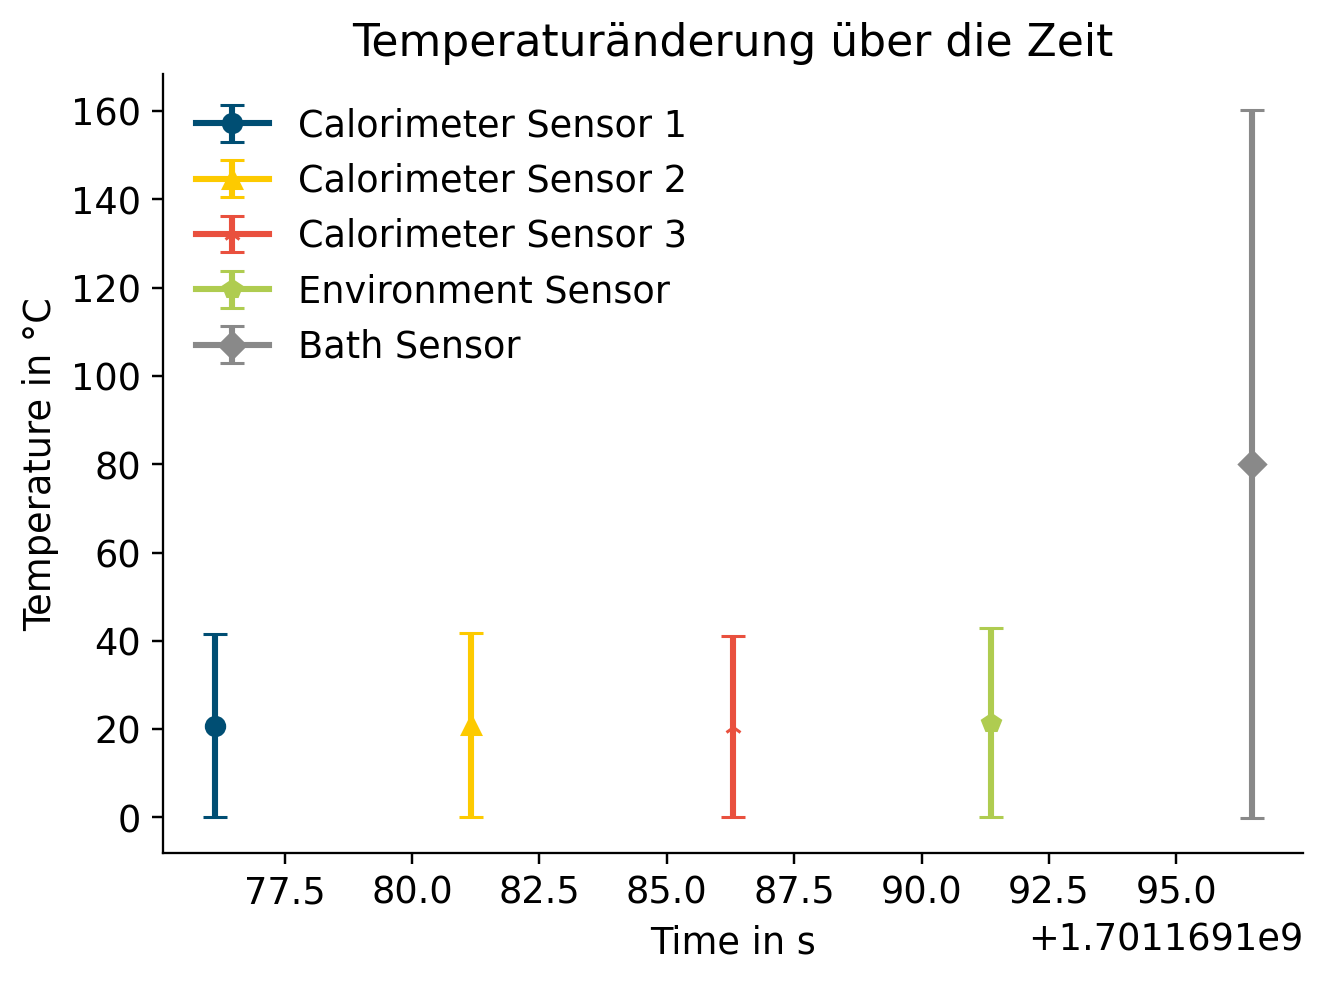

In [29]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
legend = ["Calorimeter Sensor 1", "Calorimeter Sensor 2", "Calorimeter Sensor 3", "Environment Sensor", "Bath Sensor"]
time = data_dict['time'][0]
data = data_dict['temperature']

utility.plot_temp_over_time(data, time, legend, "Time in s", "Temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

In [30]:
# TODO: Read mass of the sample from the metadata of the experiment.

folder_path= "datasheets"

# Specify the UUID for the experiment whose metadata you want to retrieve.
experiment_uuid = "1ee57b37-1b00-6b47-b00e-8332e0df15ea"

# Specify the JSON path to the mass of the sample.
mass_json_path = ["probe", "mass", "value"]

# Call the get_json_entry function to retrieve the mass value from the metadata.
sample_mass = m_json.get_json_entry(folder_path, experiment_uuid, mass_json_path)

print()
print("--> Masse der Probe 011:", sample_mass,"g")


# DONE #

datasheets/actor_immersionHeater.json
datasheets/actor_sousvide.json
datasheets/calorimeter.json
datasheets/group.json
datasheets/instrument_raspPi.json
datasheets/probe_PDC011.json

--> Masse der Probe 011: 679 g


#### (v) Anfangs- und Endwert der Temperatur

In [31]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_data = data_dict['temperature']
threshold_value = 0.05

temperature_mix, temperature_start_water = utility.get_start_end_temperature(temperature_data, threshold = threshold_value) 

print("Heat temperature:", temperature_mix,"°C")
print("Initial water temperature:", temperature_start_water,"°C")

# DONE #

Heat temperature: 80.25 °C
Initial water temperature: 21.19935344827586 °C


In [32]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(temperature_data[:10])
print("Average initial temperature:", temperature_start_sample,"°C")

# DONE #

Average initial temperature: 35.45446428571429 °C


#### (vi) spezifische Wärmekapazität bestimmen

In [33]:
# TODO: Calulate specific heat capacity of the sample.

C =  water_heat_capa # Heat capacity, 4.18
T_M = temperature_start_water  # Mixing temperature 
T_1 = temperature_start_sample  # Initial temperature of the sample 
T_2 = temperature_mix  # Initial temperature of the water bath 
m = sample_mass*10^-3  # Mass of the sample in kg


sample_heat_capa = (C * (T_M - T_1) / (m * (T_2 - T_M))) * 1000
 
# DONE #

#### (Vii) Ergebnis

In [34]:
print("Spezifische Wärmekapazität Probe 2:", sample_heat_capa,"kJ·kg-1·K-1")

Spezifische Wärmekapazität Probe 2: 0.14863340067878794 kJ·kg-1·K-1


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [35]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/heat_capacity_probe023/heat_capacity_probe023.h5"

# DONE #

In [36]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

group_path = 'RawData/' 
data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, group_path)
print(data_dict)

# DONE #

{'temperature': array([[20.6875, 20.75  , 20.75  , 20.75  , 20.6875, 20.75  , 20.75  ,
        20.75  , 20.875 , 21.3125, 21.75  , 22.125 , 22.4375, 22.6875,
        22.875 , 23.0625, 23.1875, 23.1875, 23.4375, 23.5625, 23.6875,
        23.75  , 23.875 , 23.9375, 24.    , 24.0625, 24.125 , 24.1875,
        24.25  , 24.3125, 24.375 , 24.375 , 24.4375, 24.5   , 24.5   ,
        24.5625, 24.5625, 24.625 , 24.625 , 24.6875, 24.6875, 24.6875,
        24.75  , 24.75  , 24.75  , 24.8125, 24.8125],
       [20.8125, 20.8125, 20.8125, 20.8125, 20.875 , 20.875 , 20.875 ,
        20.8125, 21.0625, 21.0625, 21.9375, 22.25  , 22.5   , 22.75  ,
        23.    , 23.125 , 23.25  , 23.4375, 23.5   , 23.625 , 23.75  ,
        23.8125, 23.875 , 24.    , 24.0625, 24.125 , 24.1875, 24.25  ,
        24.3125, 24.375 , 24.375 , 24.4375, 24.5   , 24.5   , 24.5625,
        24.5625, 24.625 , 24.625 , 24.6875, 24.75  , 24.75  , 24.75  ,
        24.8125, 24.8125, 24.8125, 24.875 , 24.875 ],
       [20.5   , 20.5   

In [37]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

sensor_uuid = np.unique(data_dict['name'])
print("Unique Sensor Names:")
print(sensor_uuid)
print()

calorimeter_sensors = [sensor_uuid[0], sensor_uuid[1], sensor_uuid[2]]
environment_sensor = [sensor_uuid[3]]
bath_sensor = [sensor_uuid[4]]

index_calorimeter = []
index_bath = []
index_env = []


# Iterate through the 'name' array and categorize sensors based on their positions
for i, sensor_id in enumerate(data_dict['name'].flatten()):
    if any(prefix in sensor_id for prefix in calorimeter_sensors):
        index_calorimeter.append(i)
    elif "1ee5ec05-4aea-68f6-ad82-53b16fffae49" in sensor_id:
        index_bath.append(i)
    elif "1ee5ec04-c845-69e2-853a-25c11543466f" in sensor_id:
        index_env.append(i)

# Print the results
print("Index of sensors in calorimeter:")
print(index_calorimeter)
print()
print("Index of sensors in bath:")
print(index_bath)
print()
print("Index of sensors in environment:")
print(index_env)

# DONE #

Unique Sensor Names:
['1ee5ec00-4a00-68a1-bb1e-873c2dd4dbde'
 '1ee5ec03-7e64-6071-8ca3-98dbab0a7719'
 '1ee5ec04-30cd-678f-a64b-0ce7544ef5e8'
 '1ee5ec04-c845-69e2-853a-25c11543466f'
 '1ee5ec05-4aea-68f6-ad82-53b16fffae49']

Index of sensors in calorimeter:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]

Index of sensors in bath:
[188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [38]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(index_calorimeter)
mean_std_environment = utility.cal_mean_and_standard_deviation(index_env)
mean_std_heater = utility.cal_mean_and_standard_deviation(index_bath)

print("Mean and Standard Deviation for Calorimeter sensors:")
print(mean_std_calorimeter)
print("Mean and Standard Deviation for Environment sensors:")
print(mean_std_environment)
print("Mean and Standard Deviation for Heater sensors:")
print(mean_std_heater)

# DONE #

Mean and Standard Deviation for Calorimeter sensors:
[[70.        ]
 [40.70217029]]
Mean and Standard Deviation for Environment sensors:
[[164.        ]
 [ 13.56465997]]
Mean and Standard Deviation for Heater sensors:
[[211.        ]
 [ 13.56465997]]


#### (iii) Daten ploten

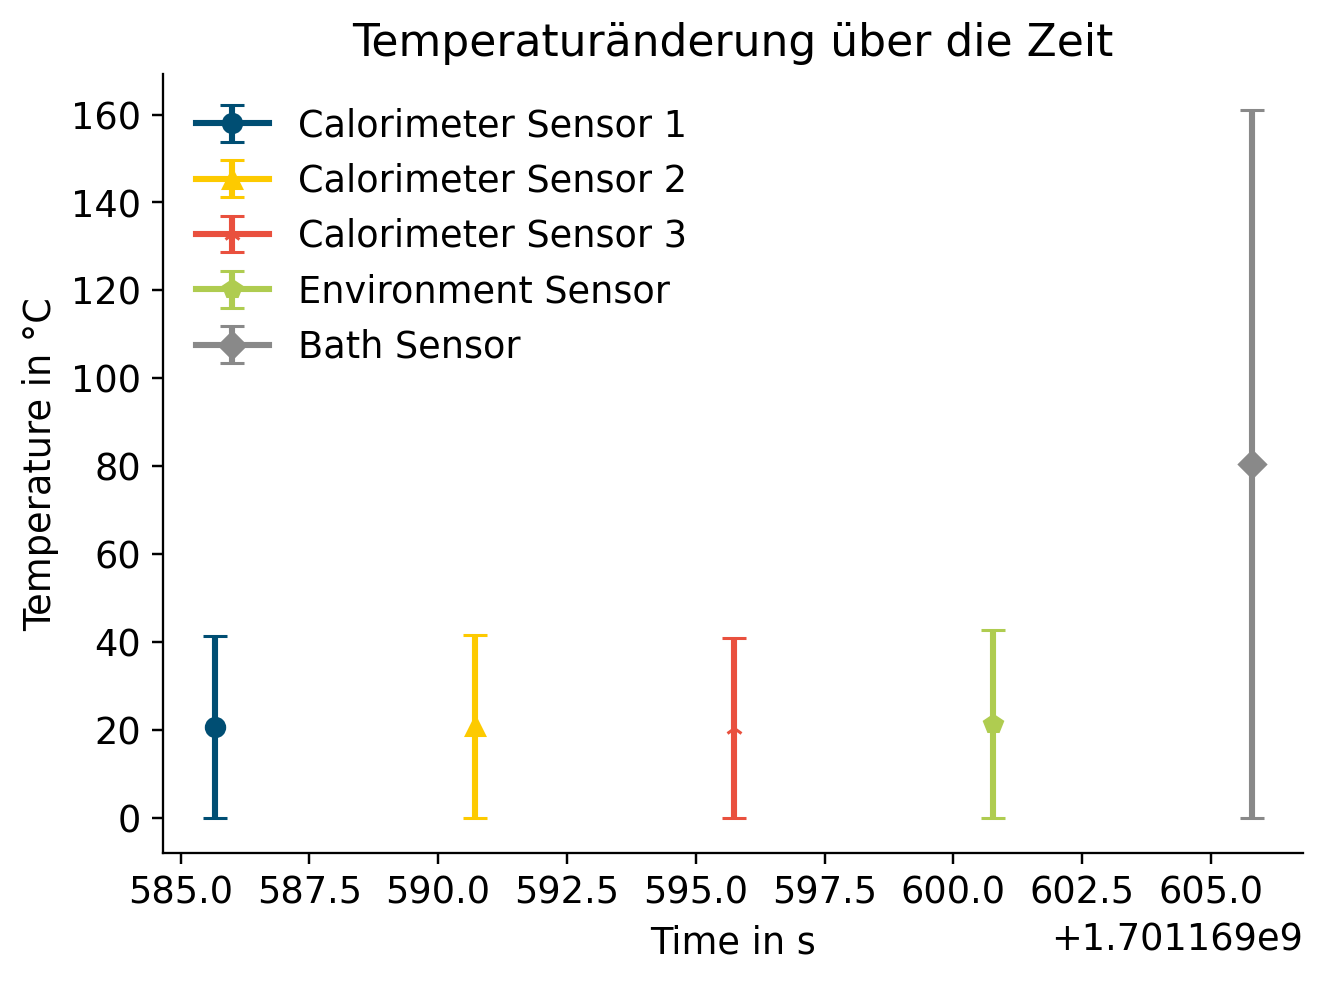

In [39]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
legend = ["Calorimeter Sensor 1", "Calorimeter Sensor 2", "Calorimeter Sensor 3", "Environment Sensor", "Bath Sensor"]
time = data_dict['time'][0]
data = data_dict['temperature']

utility.plot_temp_over_time(data, time, legend, "Time in s", "Temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

In [40]:
# TODO: Read mass of the sample from the metadata of the experiment.

folder_path= "datasheets"

# Specify the UUID for the experiment whose metadata you want to retrieve.
experiment_uuid = "1ee7d443-5a29-6863-bb97-27e7763ee3fd"

# Specify the JSON path to the mass of the sample.
mass_json_path = ["probe", "mass", "value"]

# Call the get_json_entry function to retrieve the mass value from the metadata.
sample_mass = m_json.get_json_entry(folder_path, experiment_uuid, mass_json_path)

print()
print("--> Masse der Probe 023:", sample_mass,"g")
# DONE #

datasheets/actor_immersionHeater.json
datasheets/actor_sousvide.json
datasheets/calorimeter.json
datasheets/group.json
datasheets/instrument_raspPi.json
datasheets/probe_PDC011.json
datasheets/probe_PDC023.json

--> Masse der Probe 023: 83 g


#### (v) Anfangs- und Endwert der Temperatur

In [41]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_data = data_dict['temperature']
threshold_value = 0.05

temperature_mix, temperature_start_water = utility.get_start_end_temperature(temperature_data, threshold = threshold_value) 

print("Heat temperature:", temperature_mix,"°C")
print("Initial water temperature:", temperature_start_water,"°C")

# DONE #

Heat temperature: 80.24069148936171 °C
Initial water temperature: 21.50235849056604 °C


In [42]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(temperature_data[:10])

print("Average initial temperature:", temperature_start_sample,"°C")

# DONE #

Average initial temperature: 34.23297872340426 °C


#### (vi) spezifische Wärmekapazität bestimmen

In [43]:
# TODO: Calulate specific heat capacity of the sample.

C =  water_heat_capa # Heat capacity, 4.18
T_M = temperature_start_water  # Mixing temperature 
T_1 = temperature_start_sample  # Initial temperature of the sample 
T_2 = temperature_mix  # Initial temperature of the water bath 
m = sample_mass*10^-3  # Mass of the sample in kg


sample_heat_capa = (C * (T_M - T_1) / (m * (T_2 - T_M))) * 1000

# DONE #

#### (Vii) Ergebnis

In [44]:
print("Spezifische Wärmekapazität Probe 3:", sample_heat_capa,"kJ·kg-1·K-1")

Spezifische Wärmekapazität Probe 3: 1.0928226736742797 kJ·kg-1·K-1


## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Nach den verschiedenen Versuche die wir gemacht haben, können hauptsächlich sagen, dass:
-"schwere" Materialien haben i.A eine höhere spezifische Wärmekapazität. Wir haben hier gesehen, dass Messing oder Aluminium > als ABS. Dies liegt an den verschiedenen Faktoren wie Dichte, Kristallstruktur und Molekülmasse der Materialien.
-Außerdem, haben wir auch gemerkt, dass die schwere Materialien viel schneller die maximale Temperatur erreichen und dort stagnieren. ABS braucht mehr Zeit um diese Temperatur zu erreichen und erreicht auch eine viel niedrigere Temperatur.
-Es ist aber auch zu beachten, dass es zu kleinere Abweichungen kommen kann, und vielleicht zu Rechenfehlern kommen kann, wie kleine Fehlern bei Sensoren, Schwankungen in der Stromversorgung oder noch die mit der Probe aus dem Heißwasserbad transportierte Wassermenge kann die Messergebnisse auch beeinflussen.

Die Variation der elektrischen Leistung des Tauchsieders hat direkte Auswirkungen auf die Genauigkeit der Kalorimeterkonstanten und der spezifischen Wärmekapazität der Proben. Eine zu niedrige Leistung könnte zu einer langsamen Erwärmung des Kalorimeters führen, was zu ungenauen Wärmemessungen und damit zu einer ungenauen Kalorimeterkonstanten führt. Auf der anderen Seite könnte eine zu hohe Leistung zu einer schnellen Erwärmung und möglicherweise zu übermäßigem Wärmeverlust führen, was die Genauigkeit beeinträchtigen würde. Es ist entscheidend, die Leistung so einzustellen, dass eine gleichmäßige und präzise Erwärmung des Kalorimeters gewährleistet ist, um verlässliche Ergebnisse für die spezifische Wärmekapazität der Proben zu erhalten.

Die Temperaturdifferenz zwischen dem Heißwasserbad und den Proben spielt eine zentrale Rolle bei der Genauigkeit der Messungen zur Bestimmung der spezifischen Wärmekapazität. Eine zu geringe Temperaturdifferenz könnte dazu führen, dass die Messungen empfindlich auf äußere Einflüsse reagieren, da die erfasste Wärme weniger ausgeprägt ist. Andererseits kann eine zu hohe Temperaturdifferenz zu einer schnellen Übertragung von Wärme führen, was möglicherweise zu unerwünschten Verlusten oder Ungleichgewichten führt. Die Wahl einer angemessenen Temperaturdifferenz ist entscheidend, um präzise und vergleichbare Messergebnisse zu erhalten und sicherzustellen, dass die spezifische Wärmekapazität der Proben genau bestimmt wird.

## Fazit

Die durchgeführten Versuche zur Bestimmung der spezifischen Wärmekapazität von verschiedenen Materialien, darunter Messing, Aluminium und Kunststoff (ABS), lieferten aufschlussreiche Ergebnisse. Die Haupterkenntnisse dieser Experimente können wie folgt zusammengefasst werden:

Die schwereren Materialien, insbesondere Messing und Aluminium, zeigten im Allgemeinen eine höhere spezifische Wärmekapazität im Vergleich zu Kunststoff (ABS). Dieses Resultat lässt sich durch die unterschiedliche Dichte, Kristallstruktur und Molekülmasse der Materialien erklären. Schwere Materialien erreichten zudem schneller die maximale Temperatur und stabilisierten sich auf diesem Niveau, während Kunststoff eine längere Aufwärmzeit benötigte und eine niedrigere Endtemperatur erreichte.

In Bezug auf die Forschungsfrage, welche Materialien die höchste spezifische Wärmekapazität aufweisen, konnten die Ergebnisse die Hypothese bestätigen. Dennoch sollte angemerkt werden, dass die Auswahl eines geeigneten Materials nicht nur von der spezifischen Wärmekapazität abhängt, sondern auch von anderen materialeigenen Eigenschaften, die für spezifische Anwendungen relevant sein können.

Dieses Experiment liefert einen wichtigen Beitrag zum Verständnis der thermischen Eigenschaften verschiedener Materialien und ermöglicht Ansätze für zukünftige Forschung, um die Genauigkeit der Messungen weiter zu verbessern und eine breitere Palette von Materialien zu untersuchen.